Colab에서 R 사용 가능

[링크 텍스트](https://www.youtube.com/watch?v=ugNlbyOlWlQ) #이 분 없었으면 평생 헤맸을듯

In [18]:
#엑셀 불러올 준비
system("gdown --id 1q0JuMeYNscfq2BrGuEfk-_fDZTj2y5k-")
library(readxl)

In [19]:
df_master = read_excel("df_master.xlsx") #구글 드라이브에서 주소 가져올 때 링크가 있는 모든 사용자에게 공개 꼭! 해줘야함 

In [20]:
str(df_master)

tibble [188,189 × 29] (S3: tbl_df/tbl/data.frame)
 $ CLNT_ID     : num [1:188189] 4316011 4351904 4351904 4395026 4549371 ...
 $ SESS_ID     : num [1:188189] 2889247 8220376 8220376 7473082 4421328 ...
 $ PD_C        : num [1:188189] 574397 747273 803015 722396 563452 ...
 $ PD_ADD_NM   : chr [1:188189] "1개" "(not set)" "(not set)" "1개" ...
 $ PD_BRA_NM   : chr [1:188189] "농협홍삼한삼인" "[새남해농협]" "[새남해농협]" "천지인" ...
 $ PD_BUY_AM   : num [1:188189] 39000 39000 45430 39000 61500 ...
 $ PD_BUY_CT   : num [1:188189] 1 1 1 1 1 1 1 3 5 3 ...
 $ PD_NM       : chr [1:188189] "한삼인 홍삼정 굿데이스틱 60포/쇼핑백증정" "새남해농협 해두룸 흑마늘진액 프리미엄 70ml 20팩" "[새남해농협]해두룸 흑마늘진액(80ml*30봉)" "[동원천지인] 홍삼정 데일리원 (10mlx30포)" ...
 $ CLAC1_NM    : chr [1:188189] "건강식품" "건강식품" "건강식품" "건강식품" ...
 $ CLAC2_NM    : chr [1:188189] "홍삼/인삼가공식품" "건강진액" "건강진액" "홍삼/인삼가공식품" ...
 $ CLAC3_NM    : chr [1:188189] "홍삼액" "채소즙" "채소즙" "홍삼액" ...
 $ SESS_DT     : POSIXct[1:188189], format: "2018-08-13" "2018-05-16" ...
 $ ZON_NM      : chr [1:188189] "서울" "

In [ ]:
unique(df_master$CLAC1_NM)

[1] "건강식품" "냉동식품" "냉장식품" "과일"     "축산물"

In [ ]:
length(unique(df_master$CLNT_ID)) # 고유 ID는 9만 33397명

[1] 93397

In [21]:
install.packages("plm")
library(plm)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
df_master_health <- subset(df_master, CLAC1_NM=="건강식품") 
df_master_ice <- subset(df_master, CLAC1_NM=="냉동식품") 
df_master_ref <- subset(df_master, CLAC1_NM=="냉장식품") 
df_master_fruit <- subset(df_master, CLAC1_NM=="과일")
df_master_meet  <- subset(df_master, CLAC1_NM=="축산물")
#따로 분석해볼까 싶어서 분리

In [4]:
library(dplyr)
z <- data.frame(df_master %>% group_by(SESS_DT, CLNT_ID) %>% summarise(AMOUNT=sum(PD_AMOUNT)))


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plm’:

    between, lag, lead


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


`summarise()` has grouped output by 'SESS_DT'. You can override using the `.groups` argument.



In [5]:
head(z)

,SESS_DT,CLNT_ID,AMOUNT
,<dttm>,<dbl>,<dbl>
1,2018-04-01,13597,39600
2,2018-04-01,13996,9000
3,2018-04-01,39411,54700
4,2018-04-01,51795,53800
5,2018-04-01,89523,23900
6,2018-04-01,93514,67500


In [6]:
str(z)

'data.frame':	131715 obs. of  3 variables:
 $ SESS_DT: POSIXct, format: "2018-04-01" "2018-04-01" ...
 $ CLNT_ID: num  13597 13996 39411 51795 89523 ...
 $ AMOUNT : num  39600 9000 54700 53800 23900 ...


In [7]:
#기상 변수만 추출
df_weather<- data.frame(df_master %>%
  select(SESS_DT,CLAC1_NM,SEASON,TEMP_AVG,RAINFALL_DAY,HUMID_AVG,DUST, WEEKEND))

df_weather<- df_weather[-which(duplicated(df_master$SESS_DT)),]

In [8]:
str(df_weather)

'data.frame':	183 obs. of  8 variables:
 $ SESS_DT     : POSIXct, format: "2018-08-13" "2018-05-16" ...
 $ CLAC1_NM    : chr  "건강식품" "건강식품" "건강식품" "건강식품" ...
 $ SEASON      : chr  "summer" "spring" "spring" "summer" ...
 $ TEMP_AVG    : num  30.5 23.2 22.3 26.1 21.5 14.6 23.8 23.7 21.9 24 ...
 $ RAINFALL_DAY: num  1 28.3 0 0 0 0 0 96.5 0 0 ...
 $ HUMID_AVG   : num  68.6 95.4 49.8 81 78.6 22.9 65.1 92.4 68 56.5 ...
 $ DUST        : num  33 38 44 19 45 29 25 11 29 13 ...
 $ WEEKEND     : logi  FALSE FALSE FALSE FALSE TRUE FALSE ...


In [9]:
y <- left_join(z,df_weather,by='SESS_DT')
head(y)
nrow(y)

,SESS_DT,CLNT_ID,AMOUNT,CLAC1_NM,SEASON,TEMP_AVG,RAINFALL_DAY,HUMID_AVG,DUST,WEEKEND
,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,2018-04-01,13597,39600,건강식품,spring,17.5,0,52.4,30,TRUE
2,2018-04-01,13996,9000,건강식품,spring,17.5,0,52.4,30,TRUE
3,2018-04-01,39411,54700,건강식품,spring,17.5,0,52.4,30,TRUE
4,2018-04-01,51795,53800,건강식품,spring,17.5,0,52.4,30,TRUE
5,2018-04-01,89523,23900,건강식품,spring,17.5,0,52.4,30,TRUE
6,2018-04-01,93514,67500,건강식품,spring,17.5,0,52.4,30,TRUE


[1] 131715

In [10]:
length(unique(y$SESS_DT)) #아까 duplicated 했으니 총 183일이 맞음. 
length(unique(y$CLNT_ID))

[1] 183

[1] 93397

In [ ]:
y$MONTH <- as.character(y$SESS_DT)

In [ ]:
head(y)

,SESS_DT,CLNT_ID,AMOUNT,CLAC1_NM,SEASON,TEMP_AVG,RAINFALL_DAY,HUMID_AVG,DUST,WEEKEND
,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
1,2018-04-01,13597,39600,건강식품,spring,17.5,0,52.4,30,TRUE
2,2018-04-01,13996,9000,건강식품,spring,17.5,0,52.4,30,TRUE
3,2018-04-01,39411,54700,건강식품,spring,17.5,0,52.4,30,TRUE
4,2018-04-01,51795,53800,건강식품,spring,17.5,0,52.4,30,TRUE
5,2018-04-01,89523,23900,건강식품,spring,17.5,0,52.4,30,TRUE
6,2018-04-01,93514,67500,건강식품,spring,17.5,0,52.4,30,TRUE


In [22]:
any(table(y$SESS_DT, y$CLNT_ID) !=1) #TRUE가 나오면 안되는데.....

[1] TRUE

In [40]:
attach(y)

The following objects are masked from y (pos = 6):

    AMOUNT, CLAC1_NM, CLNT_ID, DUST, HUMID_AVG, RAINFALL_DAY, SEASON,
    SESS_DT, TEMP_AVG, WEEKEND




### 정규성 검정 

출처: [링크 텍스트](http://blog.naver.com/PostView.nhn?blogId=jjy0501&logNo=221016092102)

샤피로 윌크 테스트는 사실 숫자가 커지면 할 필요가 없는 검사이기 때문입니다. R에서는 5000개 이상 샘플에 대해서도 정규성 검증을 할 수 있는 다른 방법들에 대해서 제시하고 있는데 대표적인 것은 다소 생소할 수 있는 테스트인 앤더슨 - 달링 테스트 입니다. 이를 위해서는 nortest 패키지를 설치해야 합니다. 패키지를 설치한 후 ad.test 명령어로 정규성을 검증



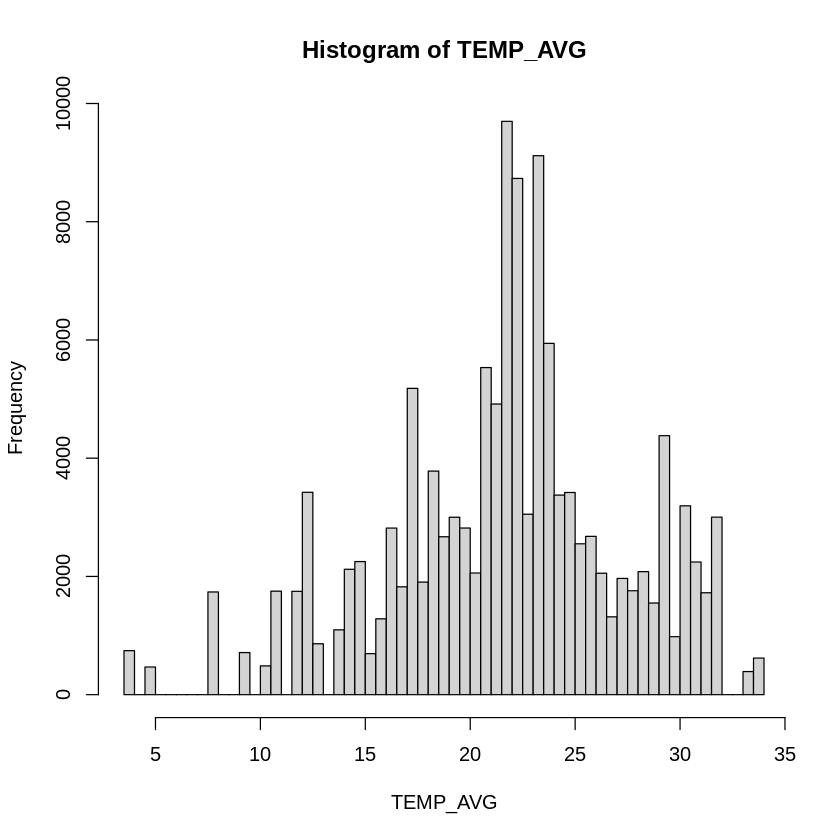

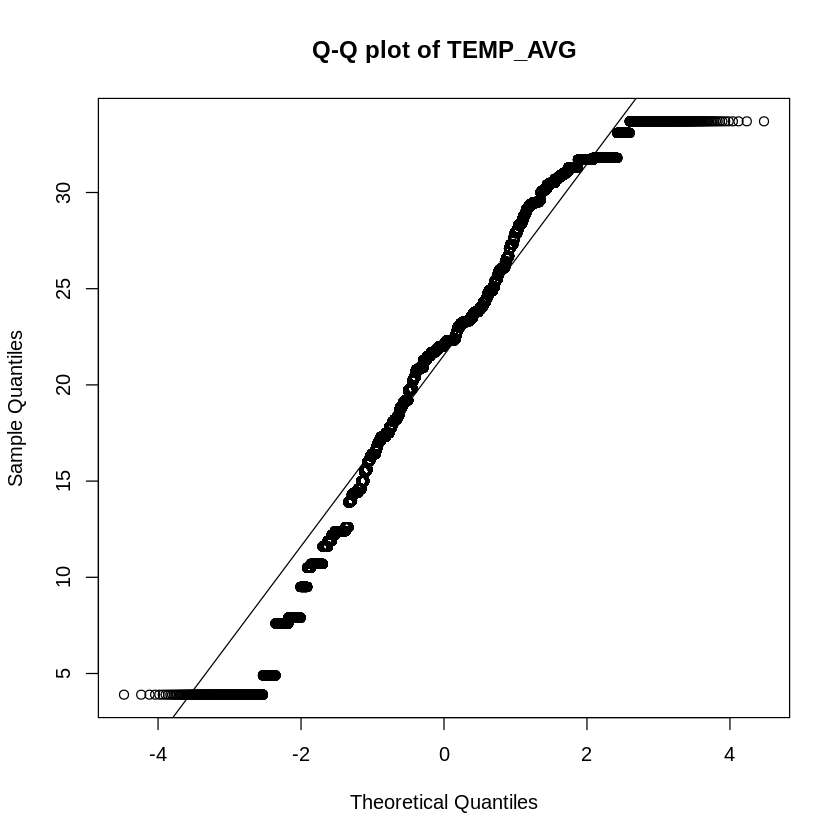

In [67]:
hist(TEMP_AVG, breaks= 100, prob= FALSE)
qqnorm(TEMP_AVG, main="Q-Q plot of TEMP_AVG")
qqline(TEMP_AVG)

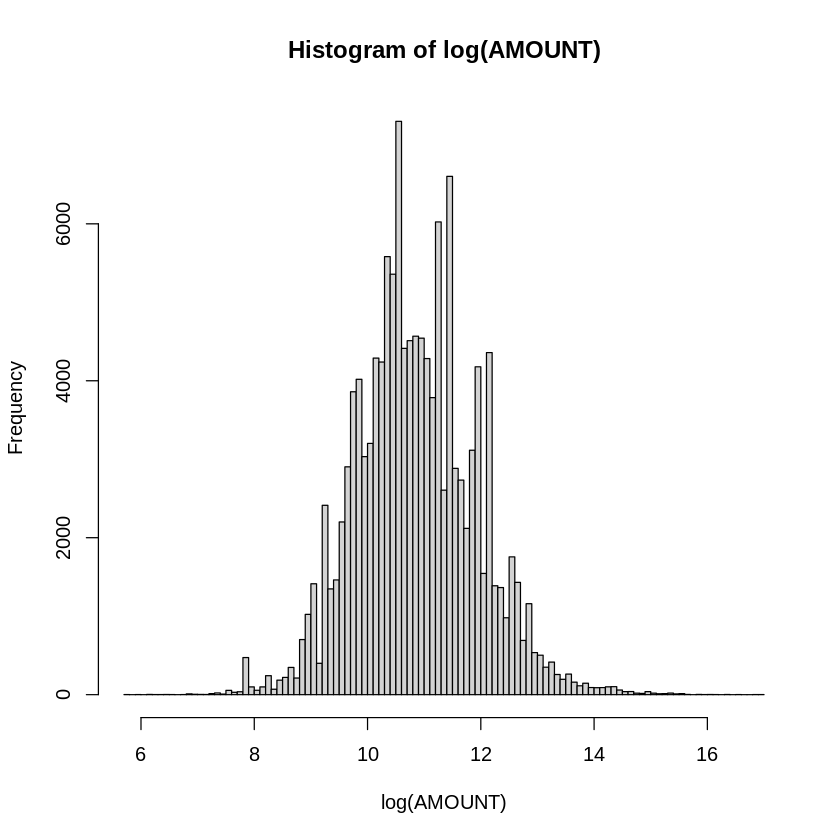

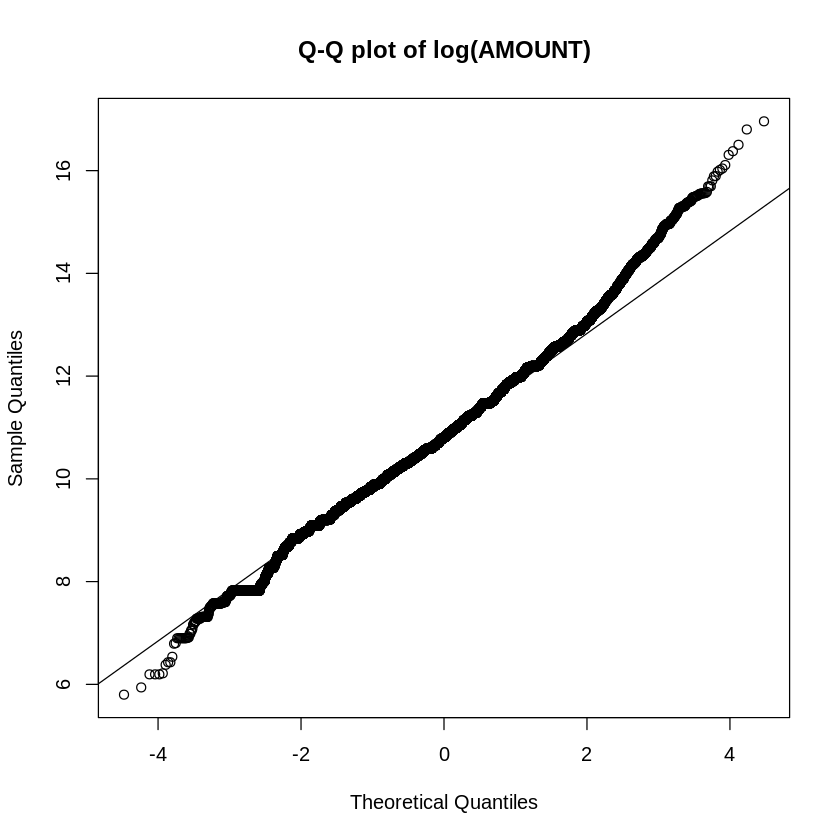

In [50]:
hist(log(AMOUNT), breaks= 100, prob= FALSE)
qqnorm(log(AMOUNT), main="Q-Q plot of log(AMOUNT)")
qqline(log(AMOUNT))

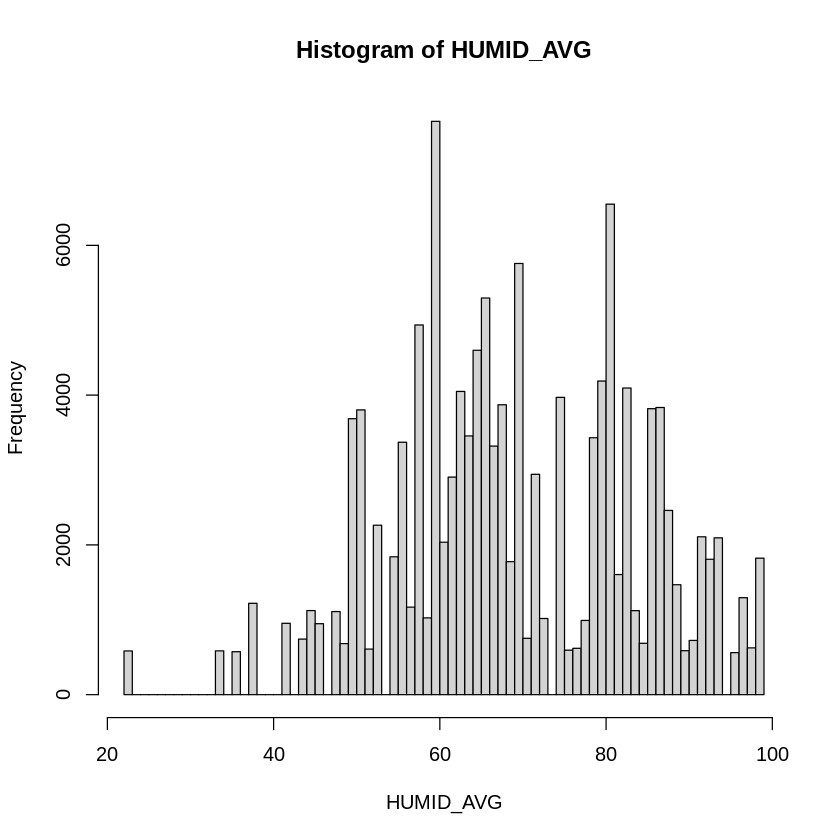

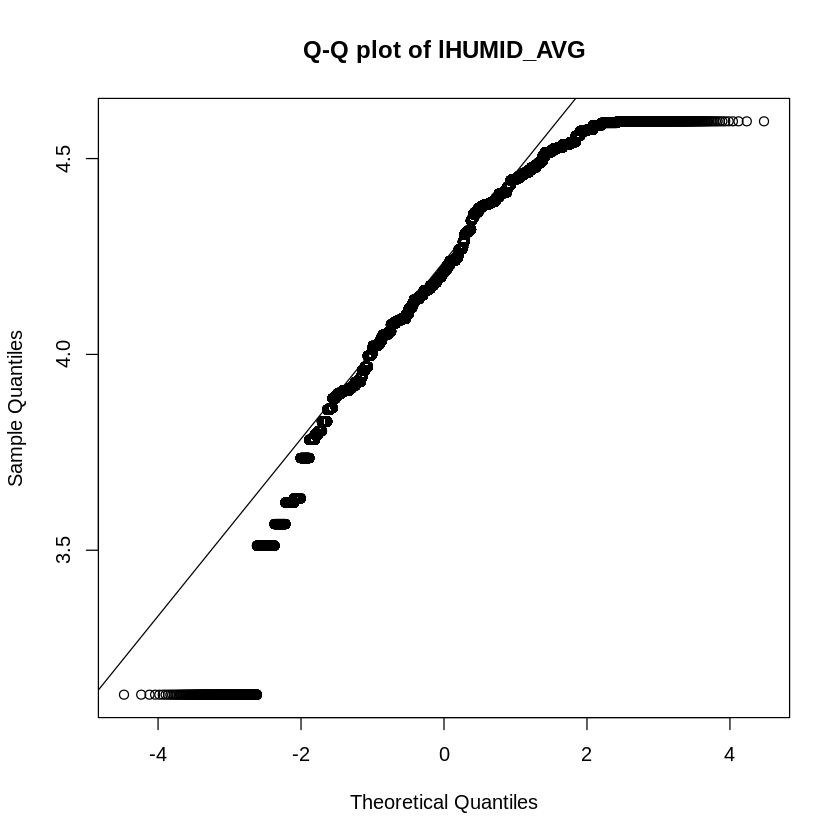

In [58]:
hist(HUMID_AVG, breaks= 100, prob= FALSE)
qqnorm(log(HUMID_AVG), main="Q-Q plot of lHUMID_AVG")
qqline(log(HUMID_AVG))

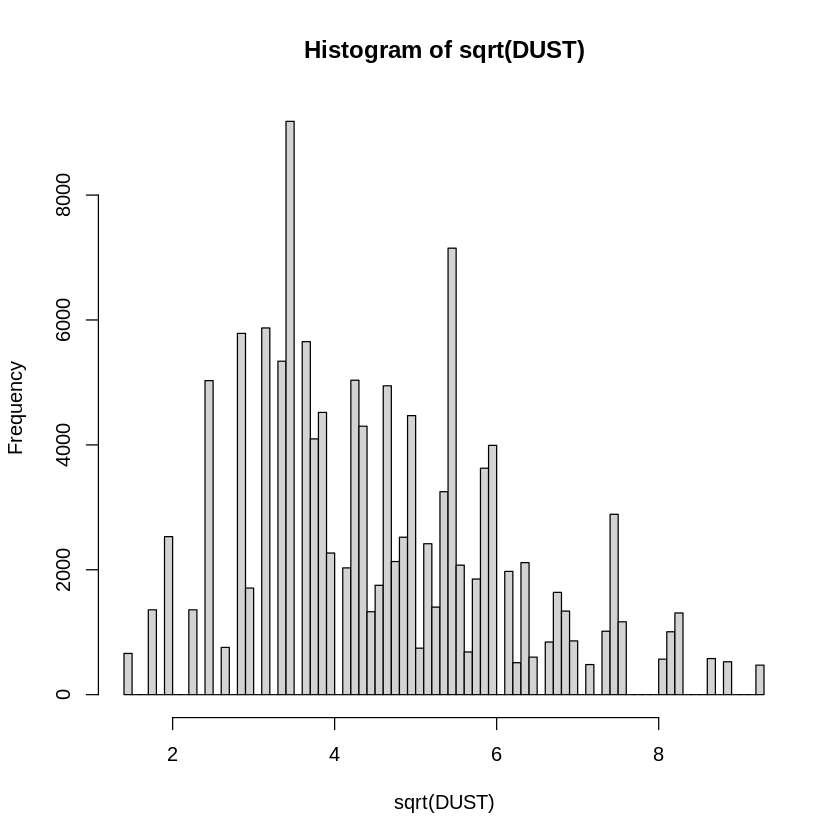

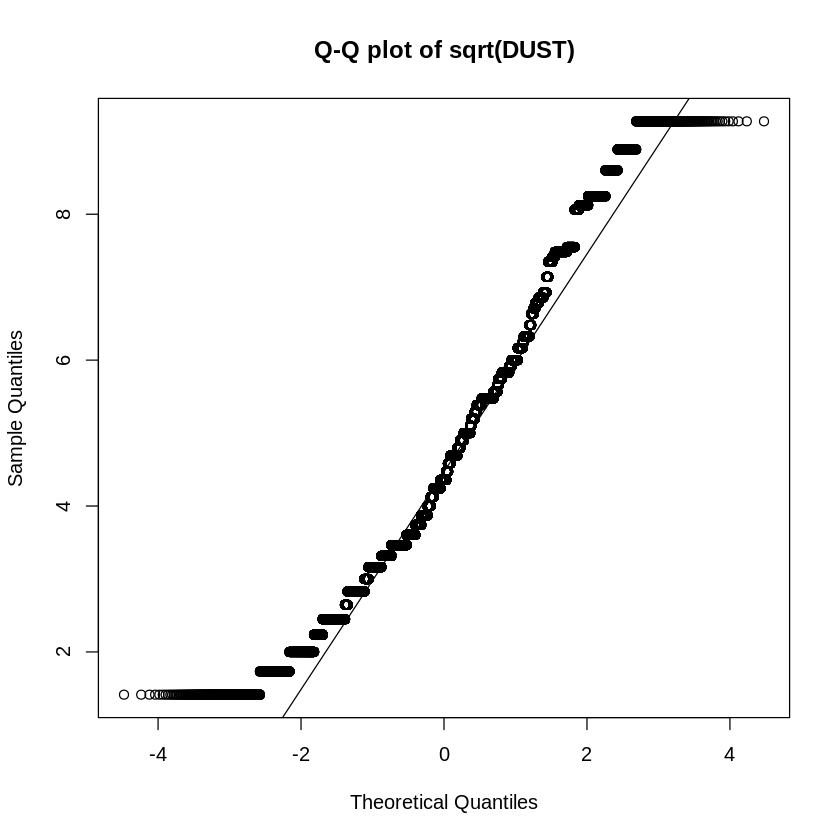

In [66]:
hist(sqrt(DUST), breaks= 100, prob= FALSE)
qqnorm(sqrt(DUST), main="Q-Q plot of sqrt(DUST)")
qqline(sqrt(DUST))

In [48]:
install.packages("nortest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [64]:
nortest::ad.test(HUMID_AVG)
nortest::ad.test(DUST)
# P값이 유의하다는 것은 이 분포가 정규분포와 차이가 있다는 것을 의미. 따라서 습도는 정규성X


	Anderson-Darling normality test

data:  HUMID_AVG
A = 630.44, p-value < 2.2e-16



	Anderson-Darling normality test

data:  DUST
A = 3723.2, p-value < 2.2e-16


#본격 모델링

In [15]:
form <- AMOUNT ~ factor(SEASON)+ TEMP_AVG+RAINFALL_DAY+HUMID_AVG+DUST

In [23]:
pooltest(form, data = y, model = "within")

ERROR: ignored

In [ ]:
#pooltest 함수를 통해 고정효과 모델에 대한 검정
pooltest(AMOUNT ~ factor(SEASON)+ TEMP_AVG+RAINFALL_DAY+HUMID_AVG+DUST, index=c("CLNT_ID", "SESS_DT"), data=y, model="within")

In [27]:
#perform Chow test
install.packages("strucchange")
library(strucchange)
sctest(y$CLNT_ID ~ y$SESS_DT, type = "Chow", point = 10)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




	Chow test

data:  y$CLNT_ID ~ y$SESS_DT
F = 11.783, p-value = 7.638e-06


In [31]:
fe <- plm(AMOUNT ~ factor(SEASON)+WEEKEND+TEMP_AVG+RAINFALL_DAY+HUMID_AVG+DUST, index=c("CLNT_ID", "SESS_DT"), data=y, model="within", effect = "twoways")
summary(fe)

ERROR: ignored

In [34]:
y <- pdata.frame(y, index = c("CLNT_ID","SESS_DT"))

In [39]:
fe <- plm(log(AMOUNT) ~ factor(SEASON)+WEEKEND+sqrt(TEMP_AVG)+RAINFALL_DAY+sqrt(HUMID_AVG)+DUST, data=y, model="within")
summary(fe)

Oneway (individual) effect Within Model

Call:
plm(formula = log(AMOUNT) ~ factor(SEASON) + WEEKEND + sqrt(TEMP_AVG) + 
    RAINFALL_DAY + sqrt(HUMID_AVG) + DUST, data = y, model = "within")

Unbalanced Panel: n = 93397, T = 1-109, N = 131715

Residuals:
   Min. 1st Qu.  Median 3rd Qu.    Max. 
-5.7170  0.0000  0.0000  0.0000  2.9283 

Coefficients:
                        Estimate  Std. Error  t-value  Pr(>|t|)    
factor(SEASON)spring -0.19342526  0.01909540 -10.1294 < 2.2e-16 ***
factor(SEASON)summer -0.20772925  0.01731585 -11.9965 < 2.2e-16 ***
WEEKENDTRUE           0.01921319  0.00835953   2.2984   0.02155 *  
sqrt(TEMP_AVG)       -0.01319837  0.00845573  -1.5609   0.11856    
RAINFALL_DAY          0.00160782  0.00025195   6.3815 1.774e-10 ***
sqrt(HUMID_AVG)      -0.00192615  0.00438057  -0.4397   0.66015    
DUST                  0.00040460  0.00024608   1.6442   0.10015    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    18142
Resid

In [ ]:
# 확률효과를 검정하기 위한 LM 검정 통계량
plmtest(AMOUNT ~ factor(SEASON) + TEMP_AVG+RAINFALL_DAY+HUMID_AVG+DUST, index=c("CLNT_ID", "MONTH"), data=y, model="random",effect = "twoways")

#확률효과 검정 결과에 의하면 1%유의 수준에서 확률효과가 없다는 귀무가설을 기각하게 되어 패널 자료에 통계적으로 유의미한 확률효과가 있다고 볼 수 있다. 


	Lagrange Multiplier Test - (Honda) for unbalanced panels

data:  AMOUNT ~ factor(SEASON) + TEMP_AVG + RAINFALL_DAY + HUMID_AVG +  ...
normal = 1781.8, p-value < 2.2e-16
alternative hypothesis: significant effects


In [32]:
re <- plm(log(AMOUNT) ~ factor(SEASON) + log(TEMP_AVG)+RAINFALL_DAY+HUMID_AVG+DUST, index=c("CLNT_ID", "SESS_DT"), data=y, model="random")
summary(re)
#와씨 r제곱 0.86

In [ ]:
phtest(fe, re)


	Hausman Test

data:  AMOUNT ~ factor(SEASON) + TEMP_AVG + RAINFALL_DAY + HUMID_AVG +  ...
chisq = 108.87, df = 6, p-value < 2.2e-16
alternative hypothesis: one model is inconsistent


### Hausman Test 해석

카이제곱 통계량은 570.75으로 1% 유의수준에서 고정효과모형과 확률효과모형이 동일하다는 귀무가설을 기각한다. 따라서 본 연구에서 사용한 데이터세트의 경우 확률효과모형이 고정효과모형에 비해 설명력이 더 높은 타당한 모형이라 판단하였다.

In [ ]:
c <- plm(log(PD_AMOUNT) ~ factor(SEASON)+TEMP_AVG+RAINFALL_DAY+HUMID_AVG+DUST, index=c("CLNT_ID"), data=df_master, model="between", effect = "twoways")
summary(c)

ERROR: ignored

In [ ]:
d <- plm(log(PD_AMOUNT) ~ factor(SEASON)+TEMP_AVG+RAINFALL_DAY+HUMID_AVG+DUST, index=c("CLNT_ID"), data=df_master, model="within", effect = "twoways")
summary(d)

# 나를 괴롭혔던 문제 

## ID와 Time의 중복 

패널 회귀분석에서는(적어도 plm함수에서는) ID와 Time이 짝을 이뤘을 때 중복이 있으면 안된다. 예를 들어 이름(ID)에 김철수, 김영희, 김민수가 있고 각각 출생연도(Time)이 1995, 1996, 1995와 같이 ID와 Time이 짝을 이루었을 때 중복이 되는 값이 없어야 한다. 그러나 본 Lpoint 데이터세트의 경우 한 ID에 대해 세션 날짜가 중복되는 경우가 많았다. 이유는 세션 ID라는 별도의 변수가 있었기 때문에 세션ID가 중복되지 않을 지언정 그 세션 ID에 해당하는 세션 날짜는 중복이 발생하였다. 

따라서 내가 index로 세션 날짜를 포함시키니 duplicate 문제가 발생함! 
그래서 groupby를 통해 한 CLNT_ID의 SESS_DT 안에서 합계 구매액을 구한 데이터 프레임을 생성하고 거기에 다시 기상 변수들을 join 시켰음. 



In [ ]:
data("Produc", package = "plm")

In [ ]:
head(Produc)
nrow(Produc)

,state,year,region,pcap,hwy,water,util,pc,gsp,emp,unemp
,<fct>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,ALABAMA,1970,6,15032.67,7325.80,1655.68,6051.20,35793.80,28418,1010.5,4.7
2,ALABAMA,1971,6,15501.94,7525.94,1721.02,6254.98,37299.91,29375,1021.9,5.2
3,ALABAMA,1972,6,15972.41,7765.42,1764.75,6442.23,38670.30,31303,1072.3,4.7
4,ALABAMA,1973,6,16406.26,7907.66,1742.41,6756.19,40084.01,33430,1135.5,3.9
5,ALABAMA,1974,6,16762.67,8025.52,1734.85,7002.29,42057.31,33749,1169.8,5.5
6,ALABAMA,1975,6,17316.26,8158.23,1752.27,7405.76,43971.71,33604,1155.4,7.7


[1] 816

In [ ]:
unique(Produc$year)

[1] 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984
[16] 1985 1986

In [ ]:
z <- plm(gsp ~ pcap+hwy+water+util+pc+emp, index=c("state","year"), data=Produc, model="within")
summary(z)

Oneway (individual) effect Within Model

Call:
plm(formula = gsp ~ pcap + hwy + water + util + pc + emp, data = Produc, 
    model = "within", index = c("state", "year"))

Balanced Panel: n = 48, T = 17, N = 816

Residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-15589.7   -698.1    -52.3      0.0    722.3  17112.5 

Coefficients:
         Estimate  Std. Error t-value  Pr(>|t|)    
pcap   1.1187e+04  1.5093e+04  0.7412    0.4588    
hwy   -1.1188e+04  1.5093e+04 -0.7413    0.4587    
water -1.1186e+04  1.5093e+04 -0.7412    0.4588    
util  -1.1188e+04  1.5093e+04 -0.7413    0.4588    
pc     9.5852e-02  1.9909e-02  4.8146 1.779e-06 ***
emp    3.6047e+01  7.9502e-01 45.3409 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Total Sum of Squares:    1.3289e+11
Residual Sum of Squares: 5028400000
R-Squared:      0.96216
Adj. R-Squared: 0.95953
F-statistic: 3229.25 on 6 and 762 DF, p-value: < 2.22e-16